     |████████████████████████████████| 458.3 MB 12 kB/s 
     |████████████████████████████████| 1.3 MB 45.5 MB/s 
     |████████████████████████████████| 4.3 MB 37.1 MB/s 
     |████████████████████████████████| 5.6 MB 30.8 MB/s 
     |████████████████████████████████| 462 kB 57.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires grpcio~=1.34.0, but you have grpcio 1.39.0 which is incompatible.
tensorflow 2.5.0 requires tensorflow-estimator<2.6.0,>=2.5.0rc0, but you have tensorflow-estimator 2.6.0 which is incompatible.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

np.set_printoptions(precision=7)
%matplotlib inline

import tensorflow_datasets as tfds

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from collections import Counter
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image

from PIL import Image

In [ ]:
import os
import errno


try:
    data_dir = 'dataset'
    os.mkdir(data_dir)
except OSError as e:
    if e.errno == errno.EEXIST:
        print('Directory  created.')
    else:
        raise

In [ ]:
dataset_name = "cifar10"

In [ ]:
(train_set, test_set), dataset_info =  tfds.load( 
              name=dataset_name, 
              split=["train", "test"], 
              with_info=True, 
              data_dir=data_dir
          )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to dataset/cifar10/3.0.2.incompleteI8XPET/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to dataset/cifar10/3.0.2.incompleteI8XPET/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to dataset/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
class_names =  dataset_info.features["label"].names

print('image shape    :', dataset_info.features['image'].shape)
print('image dtype    :', dataset_info.features['image'].dtype)
print()
print('num class      : ',dataset_info.features["label"].num_classes)
print('class label    :', dataset_info.features["label"].names)
print()
print('num train data :', dataset_info.splits["train"].num_examples)
print('num test data  :', dataset_info.splits["test"].num_examples)


image shape    : (32, 32, 3)
image dtype    : <dtype: 'uint8'>

num class      :  10
class label    : ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

num train data : 50000
num test data  : 10000


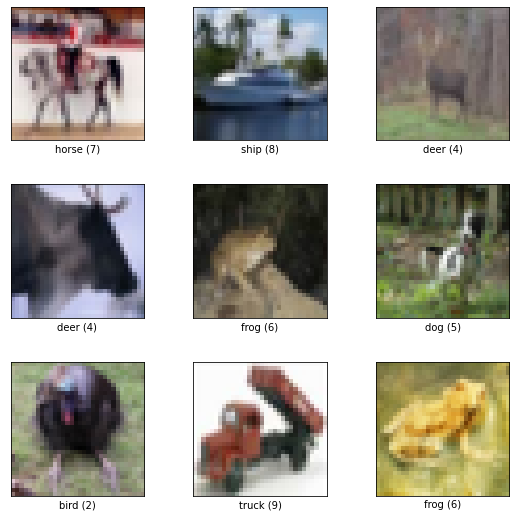

In [ ]:
fig = tfds.show_examples(train_set, dataset_info)

In [ ]:
input_shape = (80, 80, 3)

In [ ]:
X_train = []
y_train = []

for example in tfds.as_numpy(train_set):
    new_img = example['image']
    new_img = cv.resize(new_img, input_shape[:2],interpolation = cv.INTER_AREA) 
    X_train.append(new_img)
    y_train.append(example['label'])

del train_set

In [ ]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

X_train.shape = (50000, 80, 80, 3)
y_train.shape = (50000,)


In [ ]:
X_test = []
y_test = []

for example in tfds.as_numpy(test_set):
    new_img = example['image']
    new_img = cv.resize(new_img, input_shape[:2],interpolation = cv.INTER_AREA) 
    X_test.append(new_img)
    y_test.append(example['label'])

del test_set

In [ ]:
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

print('X_test.shape =',X_test.shape)
print('y_test.shape =',y_test.shape)

X_test.shape = (10000, 80, 80, 3)
y_test.shape = (10000,)


In [ ]:
X_val   = X_train[-300:]
y_val   = y_train[-300:]

X_train = X_train[:-300]
y_train = y_train[:-300]

In [ ]:
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

print('\nX_val.shape  =',X_val.shape)
print('y_val.shape  =',y_val.shape)

print('\nX_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

X_train.shape = (49400, 80, 80, 3)
y_train.shape = (49400,)

X_val.shape  = (300, 80, 80, 3)
y_val.shape  = (300,)

X_test.shape  = (10000, 80, 80, 3)
y_test.shape  = (10000,)


In [ ]:
y_train_hot = to_categorical(y_train, 102)
y_val_hot   = to_categorical(y_val, 102)
y_test_hot  = to_categorical(y_test, 102)

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (49400, 102)
y_val_hot.shape   = (300, 102)
y_test_hot.shape  = (10000, 102)


In [ ]:
import tensorflow as tf
 
model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(80, 80, 3))


219070464/219055592 [==============================] - 1s 0us/step


In [ ]:
x = model.layers[-1].output
x = GlobalAveragePooling2D() (x)
predictions = Dense(102, activation='softmax') (x)

myModel = Model(inputs=model.input, outputs=predictions)

In [ ]:
myModel.summary()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.236828 to fit



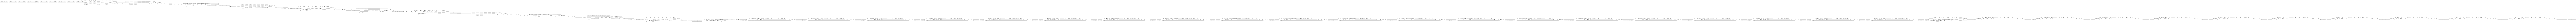

In [ ]:
plot_model(model, show_shapes=True,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=60
)

In [ ]:
myModel.compile(
      loss='categorical_crossentropy',
      optimizer=tf.keras.optimizers.Adam(), 
      metrics=['accuracy']
  )

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    channel_shift_range=0.1,
    horizontal_flip=True
)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

def lr_schedule(epoch):
    lr = 1e-3
    if (epoch > 30):
        lr *= 0.01
    elif (epoch > 20):
        lr *= 0.1
    return lr

lr_callback = LearningRateScheduler(lr_schedule)

myCheckpoint = ModelCheckpoint(filepath='./dataset/my_model.h5', 
                               monitor='val_accuracy',
                               save_best_only=True,
                              )

In [ ]:
history_all = []
batch_size = 64
epochs = 12

In [ ]:
augmented_train = datagen.flow(
    X_train, y_train_hot, batch_size
)

history = myModel.fit(
  X_train,
    validation_data=(X_val, y_val_hot),
    epochs=epochs, 
    steps_per_epoch=len(X_train)/64,
    callbacks=[lr_callback, myCheckpoint],
    verbose=2)

history_all.append(history)

NameError: ignored

NameError: ignored

In [ ]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
hist_train = []
hist_val = []

for h in history_all:
    hist_train.append(h.history['accuracy'][1:])
    hist_val.append(h.history['val_accuracy'][1:])
hist_train = np.array(hist_train).reshape(-1)
hist_val = np.array(hist_val).reshape(-1)

In [ ]:
plt.rcParams['figure.figsize'] = [7, 5] 

plt.plot(hist_train, label='train')
plt.plot(hist_val, label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
myModel.load_weights('./dataset/my_model.h5')
scores = myModel.evaluate(X_test, y_test_hot)


In [ ]:
print('Test loss    :', scores[0])
print('Test accuracy: %.2f%%' % (scores[1]*100))

In [ ]:
train_scores = myModel.evaluate(X_train, y_train_hot)
test_scores  = myModel.evaluate(X_test, y_test_hot)
val_scores   = myModel.evaluate(X_val, y_val_hot)

In [ ]:
!wget -O 'data_test_0.jpg' 'https://scx1.b-cdn.net/csz/news/800/2018/2-dog.jpg' 
!wget -O 'data_test_1.jpg' 'https://static.toiimg.com/thumb/msid-67586673,width-800,height-600,resizemode-75,imgsize-3918697,pt-32,y_pad-40/67586673.jpg'
!wget -O 'data_test_2.jpg' 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Green_tree_frog.jpg/799px-Green_tree_frog.jpg'
!wget -O 'data_test_3.jpg' 'https://bsmedia.business-standard.com/_media/bs/img/article/2019-10/15/full/1571086349-8577.jpg'
!wget -O 'data_test_4.jpg' 'https://www.om.org/img/h55955_42-62.jpg'

In [ ]:
for i in range(5):
  new_img = Image.open('data_test_'+str(i)+'.jpg')
  new_img = np.array(new_img)
  new_img2 = cv.resize(new_img, input_shape[:2], interpolation=cv.INTER_AREA)
  plt.imshow(new_img2)
  plt.axis('off')
  plt.show()

  new_img2 = np.expand_dims(new_img2,0).astype(np.float64)
  pred = myModel.predict(new_img2)
  class_id = np.argmax(pred)
  print('predicted id',class_id)
  print('class prediction', class_names[class_id])